<a href="https://colab.research.google.com/github/noallynoclan/colab/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\text{logistic:}\quad p(y)=\frac{e^{\alpha+\beta x}}{1+e^{\alpha+\beta x}}=\frac{1}{1+e^{-(\alpha+\beta x)}}$$
$$\text{odds}\bigl(p(y)\bigr)=\frac{p(y)}{1-p(y)}=e^{\alpha+\beta x};\quad p(y)=\frac{\text{odds}}{1+\text{odds}};\quad\text{log-odds}=\alpha+\beta x$$
$$\text{linear:}\quad\hat{y}_i=\alpha+\beta_1x_{i1}+...+\beta_mx_{im}$$
$$R=\frac{\sum{(y_i-\bar{y})(\hat{y}_i-\bar{\hat{y}})}}{S_{y_i}S_{\hat{y}_i}}$$
$$SS_{\text{tot}}=\sum{(y_i-\bar{y})^2};\quad SS_{\text{res}}=\sum{(y_i-\hat{y}_i)^2}$$
$${SS}_{\text{reg}}=\sum{(\hat{y}_i-\bar{y})^2}={SS}_{\text{tot}}-{SS}_{\text{res}}$$
$$R^2=\frac{SS_{\text{reg}}}{SS_{\text{tot}}}=\frac{{SS}_{\text{tot}}-{SS}_{\text{res}}}{{SS}_{\text{tot}}}$$
$$\text{worst case:}\quad\text{pred}=\hat{y}_i=\bar{y}=\text{mean}\to R^2=0;F=0$$
$$\text{best case:}\quad\text{pred}=\hat{y}_i=y_i=\text{observation}\to R^2=0$$
$$\text{Overall F-test:}\quad\begin{cases}
H_0:\text{all}\;\beta_i=0\\
H_1:\text{any}\;\beta_i\ne0
\end{cases}$$
$$\text{Assumptions:}\quad\begin{cases}
\left.
\begin{array}{l}
\text{linearity}
\end{array}
\right\}\text{each predictor and response}
\\
\left.
\begin{array}{l}
\text{normality}\\
\text{homoscedasticity}\\
\text{independence}
\end{array}
\right\}\text{residuals}
\end{cases}$$
$$\text{df}_\text{reg}=k-1=m;\quad \text{df}_\text{res}=n-k;\quad k=m+1$$
$${MS}_\text{reg}=\frac{{SS}_\text{reg}}{\text{df}_\text{reg}};\quad {MS}_\text{res}=\frac{{SS}_\text{res}}{\text{df}_\text{res}}=MSE$$
$$F=\frac{{MS}_\text{reg}}{{MS}_\text{res}}=\frac{\text{Explained Variance}}{\text{Error Variance}}\sim\text{F-distribution}$$
$$\text{p-value}=\text{F-dist.sf}(F,\text{df}_\text{reg},\text{df}_\text{res})$$
$$\text{Individual t-tests}\quad\begin{cases}
H_0:\beta_i=0\\
H_1:\beta_i\ne0\end{cases}$$
$$t_i=\frac{b_i}{se_i};\quad\text{df}=n-k$$
$$\text{p-value}=2\cdot min\bigl(\text{T-dist.sf}(t_i,\text{df}),1-\text{T-dist.sf}(t_i,\text{df})\bigr)$$
$$CI_i=b_i\pm t_{\alpha/2}\cdot se_i;\quad t_{\alpha/2}=\text{T-dist.ppf}(\alpha/2, 1-\alpha/2)$$



* **Inspect data**
    1.    Scatterplot matrix
    2.   Correlation table<br>*good when there is high correlation between response variable and each predictor<br> and low among the predictors*
*   **Check assumptions**
    1.    Enough observations? $n\ge10 \cdot m$
    2.    Check standardized residuals for normality
    3.    Inspect outliers
    4.    Perform analysis with and without otliers
    5.    Plot residuals against each predictor, check for linearity, homoscedasticity and independence
    6.    If assumptions are not met, try to transform predictors
    7.    If there is time data, check residuals against time
* **Perform analysis, interpret F-test**
    1.    Look into $\text{F-statistic}$ and Multiple $R^2$
    2.    Check that $\text{p-value}\lt \alpha$
*   **F significant $\to$ interpret individual t-tests**
    1.    For each predictor check if $\text{p-value}\lt \alpha$ 
*   **Nested models? $\to$ compare models**







In [0]:
# http://www.statsmodels.org/dev/examples/notebooks/generated/interactions_anova.html
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot
from statsmodels.stats.api import anova_lm

              S  X  E  M  G
0  16552.976982  1  1  1  4
1  12081.921403  1  3  0  3
2  20623.904111  1  3  1  6
3  14117.095194  1  2  0  2
4  14183.152300  1  3  0  3


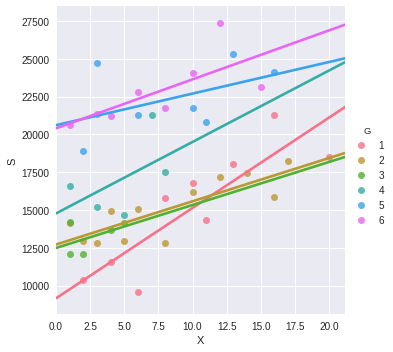

In [0]:
np.random.seed(0)
data = pd.read_table('http://stats191.stanford.edu/data/salary.table')
data['G'] = data['E'] + 3 * data['M']
data['S'] = data['S'] * np.exp(np.random.normal(scale=.1, size=len(df)))

print(data.head())
sns.lmplot('X', 'S', data=data, hue='G', palette='husl', ci=0);

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     45.95
Date:                Fri, 18 May 2018   Prob (F-statistic):           1.26e-14
Time:                        12:59:08   Log-Likelihood:                -411.65
No. Observations:                  46   AIC:                             833.3
Df Residuals:                      41   BIC:                             842.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.006e+04    742.702     13.547      0.0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


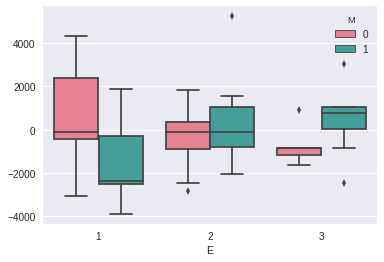

In [0]:
lm = ols('S ~ X + C(E) + M', data).fit()
print(lm.summary())
sns.boxplot('E', lm.resid, data=data, hue='M', palette='husl')

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     36.07
Date:                Fri, 18 May 2018   Prob (F-statistic):           1.96e-14
Time:                        12:59:17   Log-Likelihood:                -407.57
No. Observations:                  46   AIC:                             829.1
Df Residuals:                      39   BIC:                             841.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.143e+04    855.828     13.352      

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


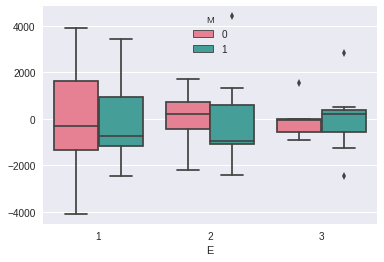

In [0]:
im = ols('S ~ X + C(E) * M', data).fit()
print(im.summary())
sns.boxplot('E', im.resid, data=data, hue='M', palette='husl')

               S   X  E  M  G        resid  resid_std          pred
11  24716.281920   3  2  1  5  4408.094619   2.623452  19723.662652
20   9556.512271   6  1  0  1 -4093.758473  -2.367222  13762.522901
24  21303.978743   7  1  1  4  3450.650440   2.090266  16928.725606
43  21248.929545  16  1  0  1  3893.608743   2.278429  17242.336278
                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     61.08
Date:                Fri, 18 May 2018   Prob (F-statistic):           4.35e-17
Time:                        12:44:08   Log-Likelihood:                -358.49
No. Observations:                  42   AIC:                             731.0
Df Residuals:                      35   BIC:                             743.1
Df Model:                   

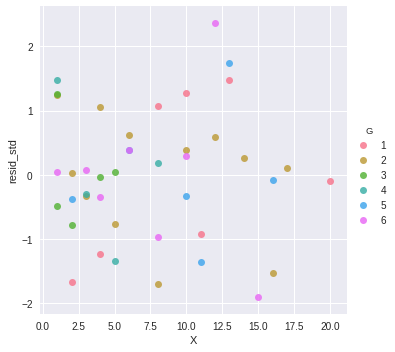

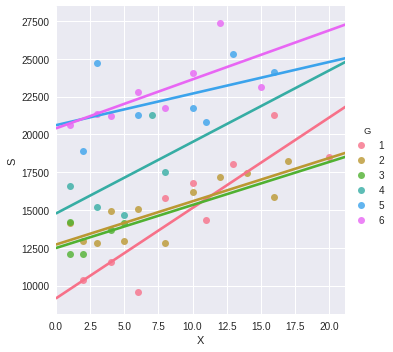

In [0]:
data['resid'] = im.resid
data['resid_std'] = im.get_influence().resid_studentized_internal
outliers = data[data['resid_std'].abs() > 2].copy()
print(outliers)
subset = data.drop(outliers.index)
imo = ols('S ~ X + C(E) * M', subset).fit()
print(imo.summary())
subset['resid_std'] = imo.get_influence().resid_studentized_internal
sns.lmplot('X', 'resid_std', data=subset, hue='G', palette='husl', fit_reg=False);
sns.lmplot('X', 'S', data=data, hue='G', palette='husl', ci=0);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


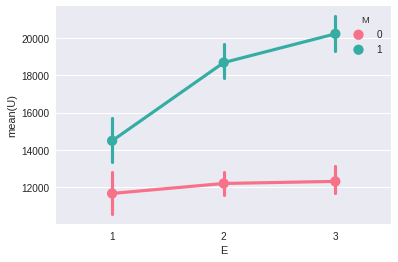

In [0]:
subset['U'] = subset['S'] - subset['X'] * imo.params['X']
ax = sns.pointplot('E', 'U', 'M', subset, palette='husl')